# Results Plotting Notebook

This notebook is designed to visualize tabular results from RL models and heuristics 

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# plt.style.use("fivethirtyeight")
from sklearn.metrics import mean_squared_error
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

import matplotlib.cm as cm
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path: str = '/Users/spencerbertsch/Desktop/dev/prometheus/src/results/heuristics/results.csv'

In [3]:
df = pd.read_csv(path, sep=',')
if 'Unnamed: 0' in df.columns: 
    df = df.iloc[:, 1:]

In [4]:
df2 = df.mean(axis=0)
df2

capacity20-speed3     3415.800000
capacity25-speed3     3164.066667
capacity33-speed3     2676.200000
capacity200-speed3    2263.666667
capacity20-speed4     3303.333333
capacity25-speed4     2849.933333
capacity33-speed4     2530.000000
capacity200-speed4    2064.466667
capacity20-speed5     2670.733333
capacity25-speed5     2447.733333
capacity33-speed5     2318.400000
capacity200-speed5    2060.333333
capacity20-speed6     2377.800000
capacity25-speed6     2242.000000
capacity33-speed6     1577.666667
capacity200-speed6    2028.733333
dtype: float64

In [5]:
# figure size must be specified in a different cell (for some reason)
sns.set(rc={'figure.figsize':(10, 6)})

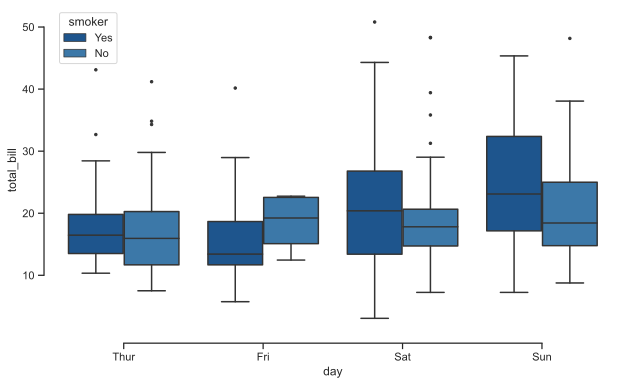

In [6]:
sns.set_theme(style="ticks", palette="Blues_r")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Set the context with a specific size


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", flierprops={"marker": "."},
            data=tips)
sns.despine(offset=10, trim=True)

plt.savefig("demo.svg")
plt.show()

In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Massage our data so it can be plotted easily using seaborn

In [8]:
df

,capacity20-speed3,capacity25-speed3,capacity33-speed3,capacity200-speed3,capacity20-speed4,capacity25-speed4,capacity33-speed4,capacity200-speed4,capacity20-speed5,capacity25-speed5,capacity33-speed5,capacity200-speed5,capacity20-speed6,capacity25-speed6,capacity33-speed6,capacity200-speed6
0,4035,3476,2143,1739,3353,4218,3790,3604,2800,1677,3486,3372,2266,3412,2744,3042
1,3989,3827,2905,2039,3418,1684,3083,835,3705,3349,2930,3643,1307,1066,930,642
2,2819,3300,1662,2397,2203,2937,2611,642,1948,966,828,467,2063,715,301,281
3,3282,3375,3125,2389,3375,3322,1436,2734,2966,3029,2881,2524,969,3302,244,2924
4,3701,3634,2071,2712,3710,2069,3396,2784,1106,1134,926,406,2938,956,2325,2354
5,3538,3265,2951,2934,3130,1616,1016,712,3703,3350,1067,3035,3217,1693,1127,261
6,3561,2691,2773,1394,2387,3527,1835,644,1448,1174,2833,2777,2179,821,625,3243
7,3311,3182,1602,2333,3308,3446,1488,3597,2999,3275,3627,547,1073,3489,298,481
8,2869,2525,3212,2757,3473,2197,3377,3192,3576,3167,3508,3204,1001,1038,2674,2687
9,2792,3465,2923,3101,3059,1571,3180,618,3540,3749,2737,3046,2923,2682,2724,2800


In [9]:
cols = ['20', '25', '33', '200', 'Normalized Aircraft Speed']
df6 = df.filter(regex='speed6')
df6['speed'] = 6
df6.columns = cols
df5 = df.filter(regex='speed5')
df5['speed'] = 5
df5.columns = cols
df4 = df.filter(regex='speed4')
df4['speed'] = 4
df4.columns = cols
df3 = df.filter(regex='speed3')
df3['speed'] = 3
df3.columns = cols

In [10]:
df3

,20,25,33,200,Normalized Aircraft Speed
0,4035,3476,2143,1739,3
1,3989,3827,2905,2039,3
2,2819,3300,1662,2397,3
3,3282,3375,3125,2389,3
4,3701,3634,2071,2712,3
5,3538,3265,2951,2934,3
6,3561,2691,2773,1394,3
7,3311,3182,1602,2333,3
8,2869,2525,3212,2757,3
9,2792,3465,2923,3101,3


In [11]:
df_speed = pd.concat([df6, df5, df4, df3], axis=0)
df_speed.head()

,20,25,33,200,Normalized Aircraft Speed
0,2266,3412,2744,3042,6
1,1307,1066,930,642,6
2,2063,715,301,281,6
3,969,3302,244,2924,6
4,2938,956,2325,2354,6


In [12]:
cols = ['Burned Nodes', 'Normalized Aircraft Speed', 'Fire Redardant Capacity']
df20 = pd.DataFrame(df_speed[['20', 'Normalized Aircraft Speed']])
df20['Fire Redardant Capacity'] = 20
df20.columns = cols

df25 = pd.DataFrame(df_speed[['25', 'Normalized Aircraft Speed']])
df25['Fire Redardant Capacity'] = 25
df25.columns = cols

df33 = pd.DataFrame(df_speed[['33', 'Normalized Aircraft Speed']])
df33['Fire Redardant Capacity'] = 33
df33.columns = cols

df200 = pd.DataFrame(df_speed[['200', 'Normalized Aircraft Speed']])
df200['Fire Redardant Capacity'] = 200
df200.columns = cols

In [13]:
df_final = pd.concat([df20, df25, df33, df200], axis=0)
df_final

,Burned Nodes,Normalized Aircraft Speed,Fire Redardant Capacity
0,2266,6,20
1,1307,6,20
2,2063,6,20
3,969,6,20
4,2938,6,20
...,...,...,...
10,1083,3,200
11,1278,3,200
12,2722,3,200
13,2272,3,200


In [22]:
df_final2 = df_final[((df_final['Normalized Aircraft Speed'] == 3) | (df_final['Normalized Aircraft Speed'] == 4))]

In [23]:
# figure size must be specified in a different cell (for some reason)
sns.set(rc={'figure.figsize':(8, 4)})

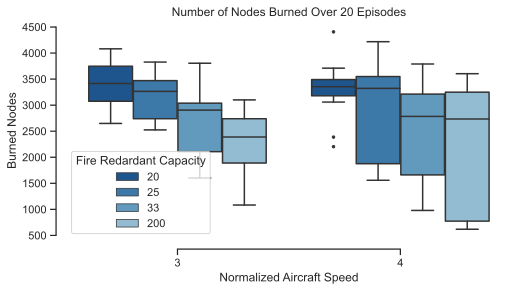

In [24]:
sns.set_theme(style="ticks", palette="Blues_r")

# Draw a nested boxplot
sns.boxplot(x="Normalized Aircraft Speed", 
            y="Burned Nodes",
            hue="Fire Redardant Capacity", 
            flierprops={"marker": "."},
            data=df_final2).set_title('Number of Nodes Burned Over 20 Episodes')
sns.despine(offset=10, trim=True)

plt.savefig("demo.svg")
plt.show()

In [34]:
# generate some results for plotting and store them in a np.array: A
q = 0.1
V = [] # <-- value of accepting the offer 
for i, gamma in enumerate(list(range(1, 100, 1))):
    gamma = 0.01 * gamma

    val = ((1 - gamma)**(1/q))/(1 - gamma)
    V.append(val)

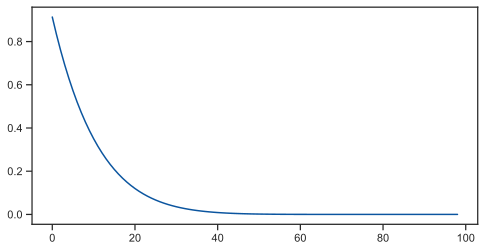

In [35]:
plt.plot(V)